In [1]:
!pip install gym
!pip install numpy
!pip install matplotlib
!pip install pygame


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\rbansal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\rbansal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\rbansal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\rbansal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import pygame

In [4]:
env=gym.make('CartPole-v1')

In [26]:
alpha_list = [0.01,0.05,0.1,0.5,1]
alpha_def = 0.1
gamma = 0.95
epsilon = 1
epsilon_runs_def = 5000
epsilon_runs = 10000
epsilon_decay = 1/10000
NUM_EPISODES = 10000 
num_actions = env.action_space.n
upper_bound = env.observation_space.high
lower_bound = env.observation_space.low
upper_bound[1] = 10
upper_bound[3] = 10
lower_bound[1] = -10
lower_bound[3] = -10
num_observations = len(env.observation_space.high)
num_bins = [20,50,20,50]

In [6]:
def q_table_init():
    Q_table = np.random.uniform(low=0, high = 1, size=(num_bins+ [num_actions]))
    return Q_table

In [7]:
def get_bins():
    
    bins = []
    for i in range(4):
        bins.append(np.linspace(lower_bound[i],upper_bound[i],num_bins[i]))   
    return bins

In [8]:
def getIndexFromBin(bin, value):
    if value < bin[0] or value > bin[len(bin)-1] :
        return False
    
    for i in range(len(bin)-1):
        if value >= bin[i] and value < bin[i+1]:
            return i

In [9]:
def get_state(bins, obs):
    state = []
    for i in range(len(obs)):
        state.append(np.digitize(obs[i],bins[i])-1)
        
    return tuple(state)
    

In [10]:
bins = get_bins()
print(get_state(bins,[-2,-10,0.1,393]))

(5, 0, 11, 49)


In [18]:
def simulate(type, alpha = alpha_def):
    rewards = []
    Q_table = q_table_init()
    epsilon = 1
    np.random.seed(0)
    for i in range(NUM_EPISODES):
        #print(epsilon)
        current_state = get_state(bins,env.reset()[0])
        #env._seed(0)
        reward = 0
        done = False
        j = 0
        if i < epsilon_runs:
            epsilon = epsilon - epsilon_decay
        while(not done):
            
            
            if np.random.random() > epsilon:
                action = np.argmax(Q_table[current_state])
            else:
                action = np.random.randint(0,num_actions)
            
            observation, r, d, _, _ = env.step(action)
            done = d
            reward += r
            next_state = get_state(bins,observation)
                
            Q_max = np.max(Q_table[next_state])
            Q_sa = Q_table[current_state + tuple([action])]
            
            if done and reward < 200:
                r = -375
            
            new_Q = Q_sa + alpha * (r + gamma*Q_max - Q_sa)
            Q_table[current_state + tuple([action])] = new_Q
            
            current_state = next_state
            
        rewards.append(reward)
    
    avg_rewards = []
    max_rewards = []
    min_rewards = []
    runs = []
    i = 0
    while i < len(rewards) - 100:
        avg_rewards.append(np.mean(rewards[i:i+100]))
        max_rewards.append(np.max(rewards[i:i+100]))
        min_rewards.append(np.min(rewards[i:i+100]))
        runs.append(i)
        i += 100
        
    if type == "Default":
        return avg_rewards, max_rewards, min_rewards, runs
    
    else:
        return avg_rewards, runs
        

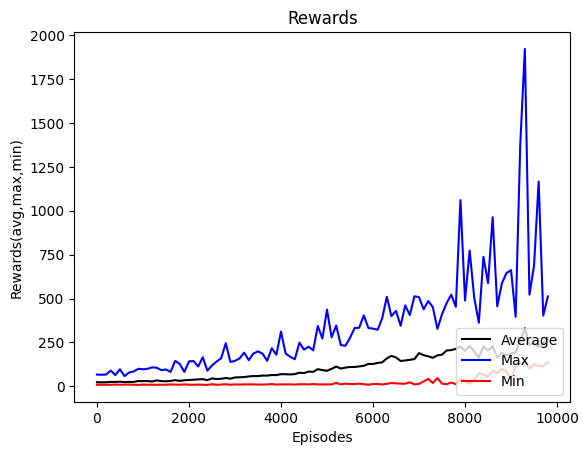

In [29]:
avg_rewards, max_rewards, min_rewards, runs = simulate("Default")
plt.plot(runs, avg_rewards, label='Average', color='black')
plt.plot(runs, max_rewards, label='Max', color='blue')
plt.plot(runs, min_rewards, label='Min', color='red')
plt.title('Rewards')
plt.xlabel('Episodes')
plt.ylabel('Rewards(avg,max,min)')
plt.legend(loc=4)
 #plt.show()
plt.savefig('Discrete-default.png')

In [31]:
alpha_rewards = []
for alpha in alpha_list:
    avg_rewards, runs = simulate("alpha",alpha=alpha)
    alpha_rewards.append(avg_rewards)
    print(alpha)

0.01
0.05
0.1
0.5
1


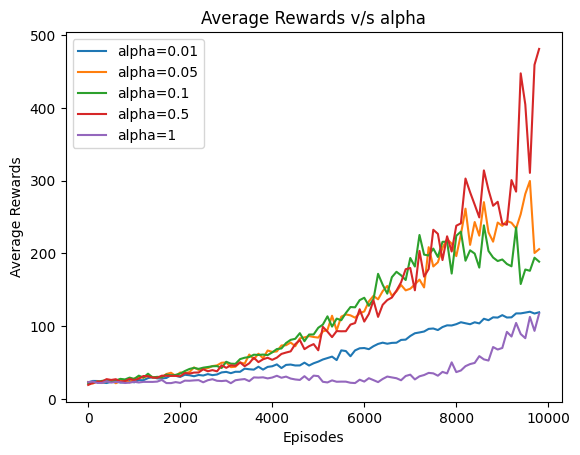

In [32]:
for i,alpha in enumerate(alpha_list):
    plt.plot(runs,alpha_rewards[i], label = 'alpha=' + str(alpha))
plt.title('Average Rewards v/s alpha')
plt.xlabel('Episodes')
plt.ylabel('Average Rewards')
plt.legend(loc=0)
 #plt.show()
plt.savefig('Discrete-alpha.png')